In [1]:
import maze_prob1 as mz
import numpy as np

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze
#mz.draw_maze(maze)

In [3]:
env = mz.Maze(maze)
T = 20
_, policy = mz.dynamic_programming(env, T)

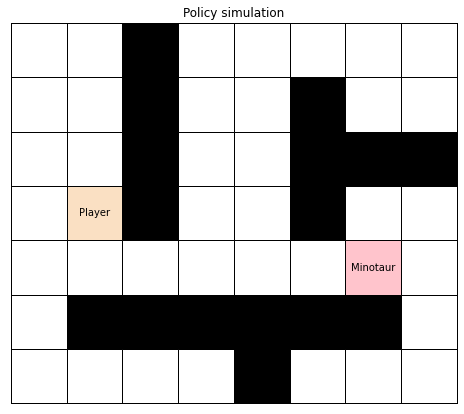

In [ ]:
method = 'DynProg';
start  = (0,0,6,5);
path = env.simulate(start, policy, method);
mz.animate_solution(maze, path)
#path

In [ ]:
end_state = (6,5)
end_states = []
for states in env.map:
    if states[0:2] == end_state:# and states[2:] != end_state:
        end_states.append(env.map[states])

In [ ]:
#s_p = np.zeros((env.n_states))
#s_p[env.map[start]] = 1.0
prev_state = env.map[start]
p_exit = []
for i in range(1,len(path)):
    s = env.map[path[i]]
    s_a = policy[prev_state,i-1]
    t_l = []
    for end in end_states:
        trans = (env.transition_probabilities[end, prev_state, int(s_a)])
        #if end == env.map[(6,5,2,3)] and prev_state == env.map[(6,6,2,1)]:
        #    print(trans)
        t_l.append(trans)
    p_exit.append(np.sum(t_l))
    prev_state = s


In [ ]:
print(path)

In [ ]:
import matplotlib.pyplot as plt
print(len(p_exit))
plt.scatter([t for t in range(len(p_exit))], p_exit)
#p_exit

In [ ]:
#V,policy = mz.value_iteration(env, 1-(1/30), 0.01)

In [ ]:
#method = 'ValIter';
#start  = (0,0,6,5);
#path = env.simulate(start, policy, method);
#mz.animate_solution(maze, path)